In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [2]:
from numerical_methods.root_finding.domain.models.function import Function
import numpy as np
from numerical_methods.root_finding.application import comparison
from numerical_methods.root_finding.domain.methods.dichotomy import DichotomySolver
from numerical_methods.root_finding.domain.methods.newton_refined import NewtonRefinedSolver
from numerical_methods.root_finding.domain.methods.regula_false_modified import RegulaFalsiModifiedSolver
from numerical_methods.root_finding.domain.methods.regula_falsi import RegulaFalsiSolver
from numerical_methods.root_finding.domain.models.interval import Interval
from numerical_methods.root_finding.domain.models.problem import Problem
from numerical_methods.root_finding.domain.models.solver_config import SolverConfig
from numerical_methods.root_finding.infrastructure.plotting import plot_residual_vs_time
from numerical_methods.root_finding.infrastructure.timing.perf_timer import PerfTimer
from numerical_methods.root_finding.domain.methods.newton import NewtonSolver
from numerical_methods.root_finding.domain.methods.secant import SecantSolver
from numerical_methods.root_finding.domain.methods.steffensens import SteffensensSolver
from numerical_methods.root_finding.domain.models.one_guess import OneGuess
from numerical_methods.root_finding.domain.models.two_guesses import TwoGuesses
from numerical_methods.root_finding.domain.models.root_multiplicity import RootMultiplicity

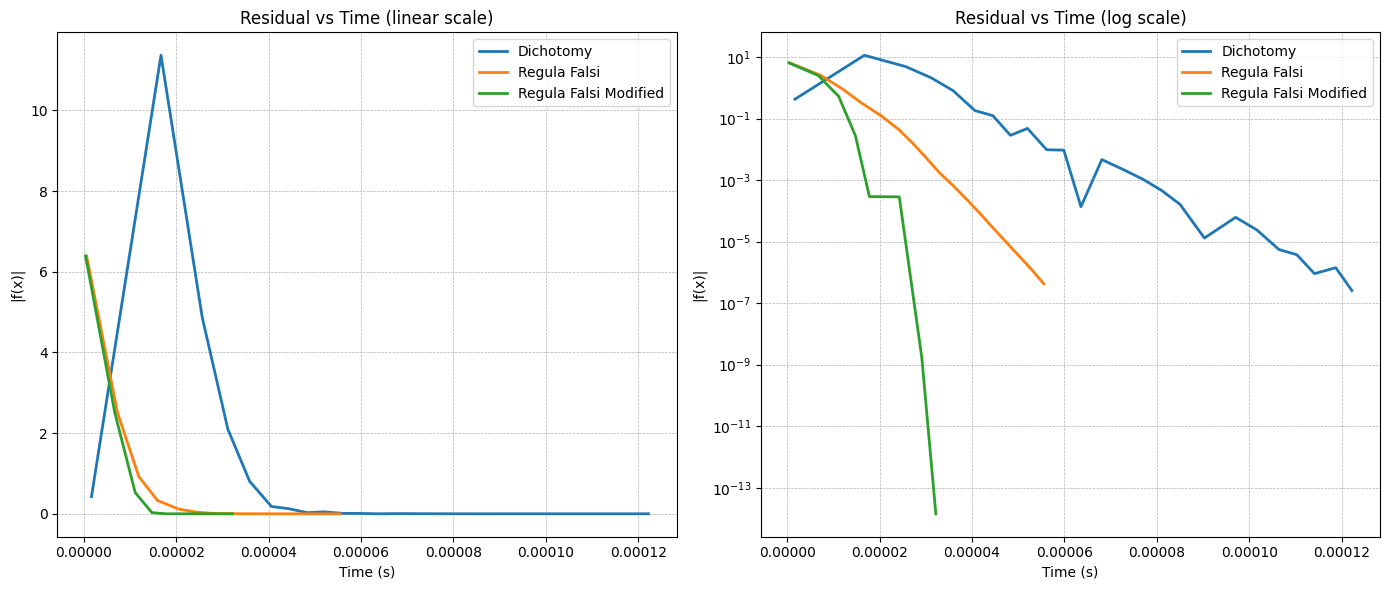

Root:
Dichotomy             - 14.780203700065613
Regula Falsi          - 14.78020404812268
Regula Falsi Modified - 14.780203831661062

Iterations:
Dichotomy             - 25
Regula Falsi          - 17
Regula Falsi Modified - 8


In [3]:
m = 68.1
v = 40
t = 10
g = 9.8

f = Function("$v = \\frac{gm}{c}(1 − e^{−\\frac{c}{m}t})$", lambda c: g*m/c*(1 - np.e ** (-c/m*t)) - v)

problem = Problem(
    f=f,
    interval=Interval(5, 25),
)

config = SolverConfig(
    eps=1e-6,
)

methods = {
    "Dichotomy": DichotomySolver(config),
    "Regula Falsi": RegulaFalsiSolver(config),
    "Regula Falsi Modified": RegulaFalsiModifiedSolver(config),
}

timer = PerfTimer()

comparison_service = comparison.ComparisonService(timer)
results = comparison_service.compare(methods, problem)

plot_residual_vs_time({result.method_name: result.residual_curve for result in results.comparison})


print("Root:")
max_len = max(len(result.method_name) for result in results.comparison)
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.root}")
    
print()

print("Iterations:")
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.iterations}")

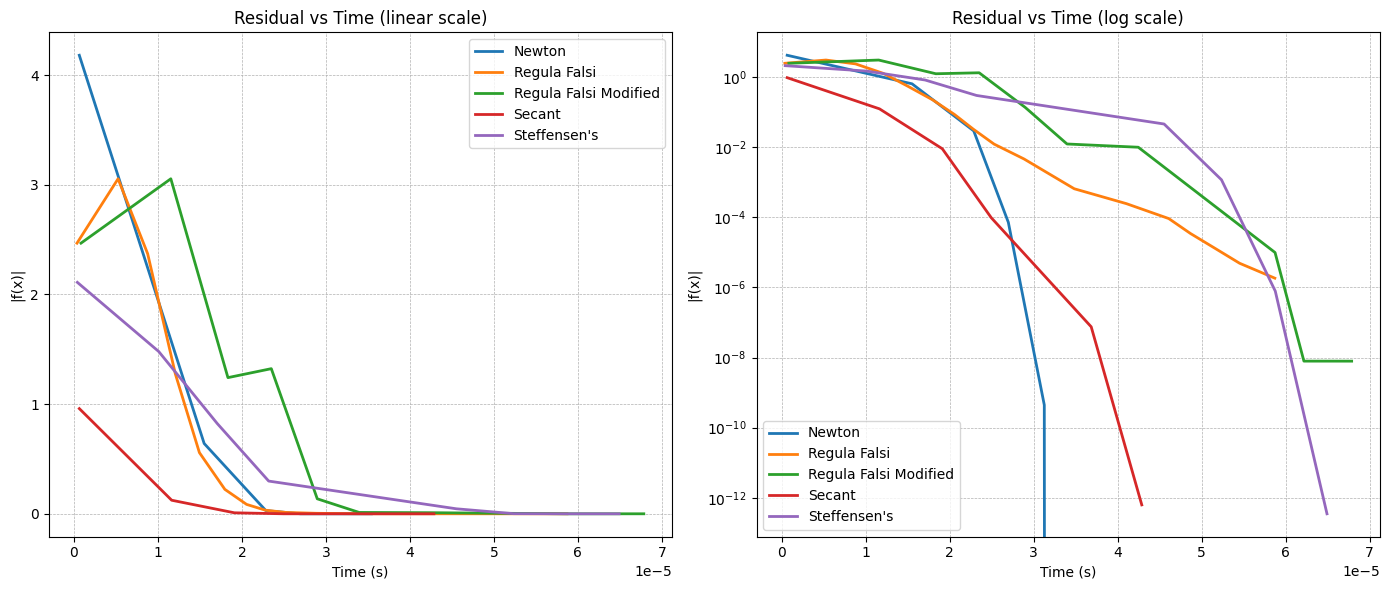

Root:
Newton                - 0.7034395711636395
Regula Falsi          - -0.9504514307769137
Regula Falsi Modified - -0.9504516861130393
Secant                - 0.7034395711635574
Steffensen's          - 0.7034395711635938

Iterations:
Newton                - 6
Regula Falsi          - 18
Regula Falsi Modified - 10
Secant                - 6
Steffensen's          - 8


In [4]:
f = Function("", lambda x: 4 * (1- x**2) - np.e ** x, lambda x: -8 * x- np.e**x)

problem = Problem(
    f=f,
    interval=Interval(-2, 0.5),
    one_guess=OneGuess(0.2),
    two_guesses=TwoGuesses(0.2, 0.5)
)

config = SolverConfig(
    eps=1e-6,
)

methods = {
    "Newton": NewtonSolver(config),
    "Regula Falsi": RegulaFalsiSolver(config),
    "Regula Falsi Modified": RegulaFalsiModifiedSolver(config),
    "Secant": SecantSolver(config),
    "Steffensen's": SteffensensSolver(config),
}

timer = PerfTimer()

comparison_service = comparison.ComparisonService(timer)
results = comparison_service.compare(methods, problem)

plot_residual_vs_time({result.method_name: result.residual_curve for result in results.comparison})


print("Root:")
max_len = max(len(result.method_name) for result in results.comparison)
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.root}")
    
print()

print("Iterations:")
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.iterations}")

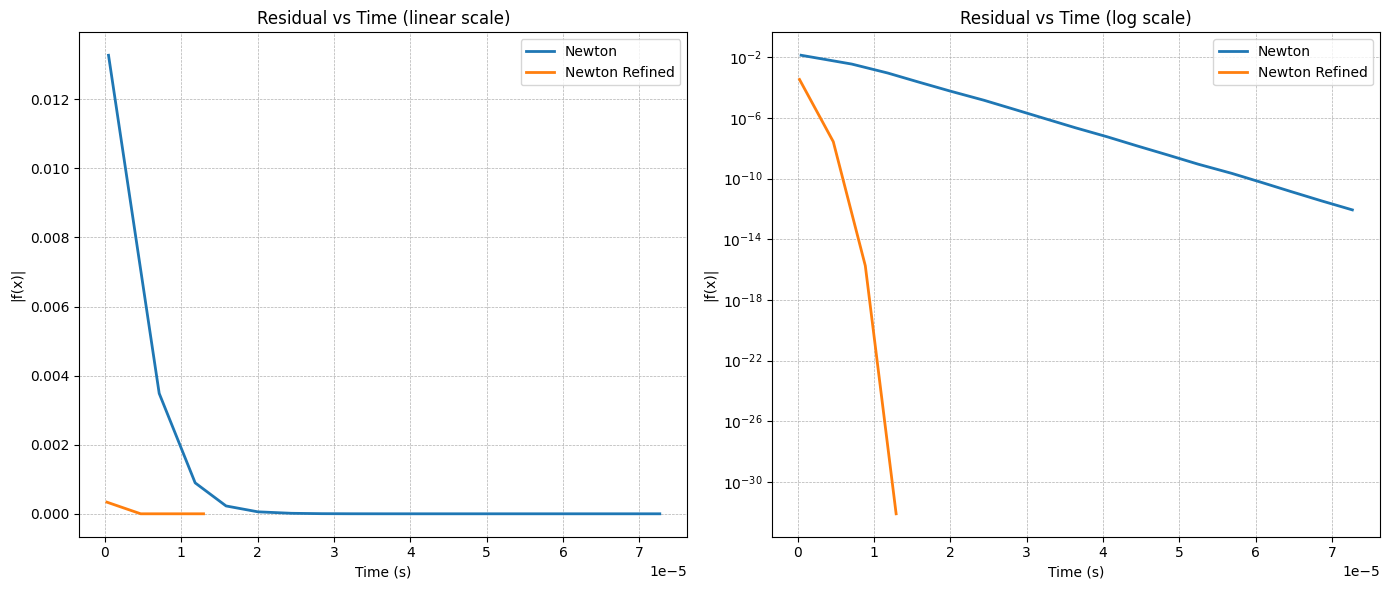

Root:
Newton         - 9.265460619358839e-07
Newton Refined - 8.99696856790367e-17

Iterations:
Newton         - 18
Newton Refined - 4


In [10]:
f = Function("", lambda x: x**2 * np.e**x, lambda x: np.e ** x * (x**2 + 2*x))

problem = Problem(
    f=f,
    one_guess=OneGuess(0.2),
    root_multiplicity=RootMultiplicity(2)
)

config = SolverConfig(
    eps=1e-6,
)

methods = {
    "Newton": NewtonSolver(config),
    "Newton Refined": NewtonRefinedSolver(config),
}

timer = PerfTimer()

comparison_service = comparison.ComparisonService(timer)
results = comparison_service.compare(methods, problem)

plot_residual_vs_time({result.method_name: result.residual_curve for result in results.comparison})


print("Root:")
max_len = max(len(result.method_name) for result in results.comparison)
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.root}")
    
print()

print("Iterations:")
for result in results.comparison:
    print(f"{result.method_name:<{max_len}} - {result.iterations}")